# Training a Fruit Classifer using a CNN

Source: https://github.com/antonnifo/fruits-360/blob/master/Fruit%20Classifer.ipynb

Horea Muresan, Mihai Oltean, Fruit recognition from images using deep learning, Acta Univ. Sapientiae, Informatica Vol. 10, Issue 1, pp. 26-42, 2018.

In [17]:
# Keras-spezifische Importe
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Metriken und Evaluation
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

# Utilities und Hilfsfunktionen
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

num_classes = 81
img_rows, img_cols = 100, 100
batch_size = 16

Training_data sind die Training Daten. Hingegen die Test Daten hier als validation_data gekennzeichnet sind.
Hintergrund ist das beim $model.fit()$ sonst eine Fehlermeldung kommt, da es $validation$ als Übergabeparameter haben will.

In [6]:
train_data_dir = 'frutis_360/fruits-360_dataset/fruits-360/LessData/Training'
validation_data_dir = 'frutis_360/fruits-360_dataset/fruits-360/LessData/Test'

In [7]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)

print("Training: ")
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size =batch_size,
        class_mode='categorical',
        shuffle=True)

print("Test: ") 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Training: 
Found 41310 images belonging to 81 classes.
Test: 
Found 13873 images belonging to 81 classes.


## Definition of the model

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Ausgabe der Modell Zusammenfassung
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 activation_12 (Activation)  (None, 100, 100, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 49, 49, 32)        0         
                                                      

In [11]:
checkpoint = ModelCheckpoint("fruits_fresh_cnn_1.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop, checkpoint, reduce_lr]

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

nb_train_samples = 41310
nb_validation_samples = 13873
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


Epoch 1/10


2024-01-20 19:46:12.590782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2581/2581 [==============================] - ETA: 0s - loss: 1.5158 - accuracy: 0.5518

2024-01-20 19:52:36.275483: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_loss improved from inf to 0.44427, saving model to fruits_fresh_cnn_1.h5
2581/2581 [==============================] - 418s 162ms/step - loss: 1.5158 - accuracy: 0.5518 - val_loss: 0.4443 - val_accuracy: 0.8628 - lr: 0.0010
Epoch 2/10
2581/2581 [==============================] - ETA: 0s - loss: 0.5730 - accuracy: 0.8392
Epoch 2: val_loss improved from 0.44427 to 0.15023, saving model to fruits_fresh_cnn_1.h5
2581/2581 [==============================] - 456s 177ms/step - loss: 0.5730 - accuracy: 0.8392 - val_loss: 0.1502 - val_accuracy: 0.9555 - lr: 0.0010
Epoch 3/10
2581/2581 [==============================] - ETA: 0s - loss: 0.5693 - accuracy: 0.8634
Epoch 3: val_loss did not improve from 0.15023
2581/2581 [==============================] - 462s 179ms/step - loss: 0.5693 - accuracy: 0.8634 - val_loss: 0.4837 - val_accuracy: 0.8578 - lr: 0.0010
Epoch 4/10
2581/2581 [==============================] - ETA: 0s - loss: 0.6974 - accuracy: 0.8599
Epoch 4: val_loss did not improv

## Displaying the confusion matrix

In [12]:
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

In [18]:
#Confusion Matrix und Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

cnn_accuracy = accuracy_score(validation_generator.classes, y_pred)
cnn_f1 = f1_score(validation_generator.classes, y_pred, average='weighted')
print('Accuracy: {:.2f}%'.format(cnn_accuracy*100))
print('F1: {:.2f}'.format(cnn_f1*100))

2024-01-20 20:33:45.446686: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Confusion Matrix
[[149   0   0 ...   0   0   0]
 [  0 160   0 ...   0   0   0]
 [  0   0 164 ...   0   0   0]
 ...
 [  0   0   0 ... 164   0   0]
 [  0   0   0 ...   0 127   0]
 [  0   0   0 ...   0   0 249]]
Classification Report
                     precision    recall  f1-score   support

     Apple Braeburn       0.63      0.91      0.74       164
     Apple Golden 1       0.92      1.00      0.96       160
     Apple Golden 2       0.94      1.00      0.97       164
     Apple Golden 3       0.68      1.00      0.81       161
 Apple Granny Smith       1.00      0.57      0.73       164
        Apple Red 1       0.88      1.00      0.93       164
        Apple Red 2       1.00      0.75      0.86       164
        Apple Red 3       0.57      0.49      0.53       144
Apple Red Delicious       1.00      1.00      1.00       166
   Apple Red Yellow       1.00      0.77      0.87       164
            Apricot       0.97      1.00      0.98       164
            Avocado       1.00      

2024-01-20 20:27:07.786952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


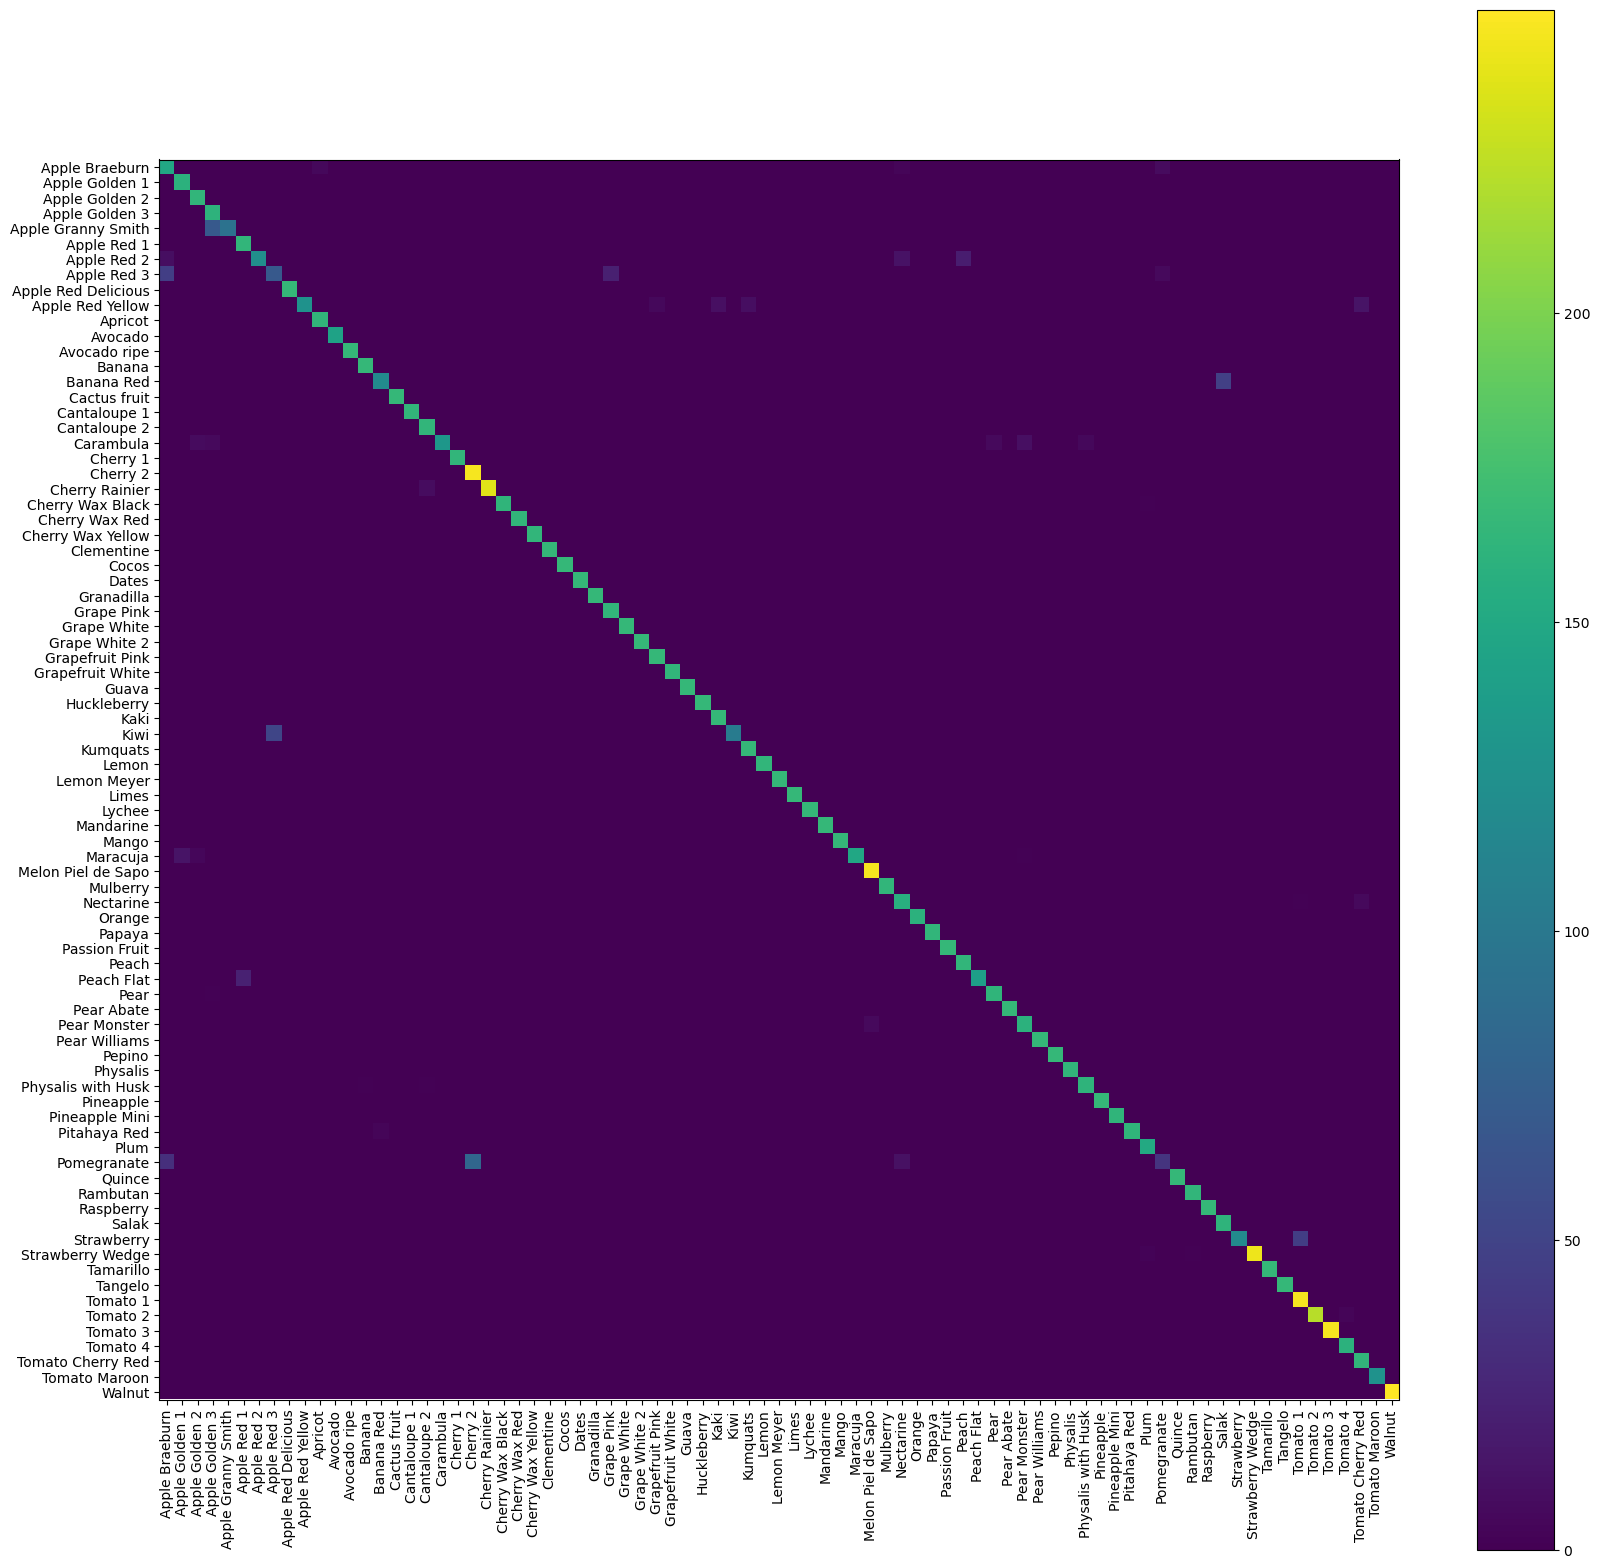

In [14]:
img_row, img_height = 100,100
model = load_model('fruits_fresh_cnn_1.h5')


#Confusion Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)